In [1]:
import kdegree
import networkx as nx
import numpy as np

I'm gonna select the degree k and the dataset to anonymize:

In [2]:
file_graph = "Dataset/graph_friend_5_10_5.csv"
# file_graph = "Dataset/graph_friend_6_10_6.csv"
k = 2

Then the dataset must be properly parsed to a graph. For now, it's basically a list of lists. 

['Lorenzo', 'Giacomo', 'Riccardo', 'Pedu', 'Simo']


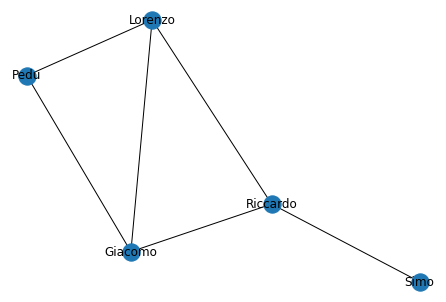

In [3]:
G = nx.Graph()
    
if os.path.exists(file_graph): 
    # if file exist
    with open(file_graph) as f:
        content = f.readlines()
    # read each line
    content = [x.strip() for x in content]
    for line in content:
        # split name inside each line
        names = line.split(",")
        start_node = names[0]
        if start_node not in G:
            G.add_node(start_node)
        for index in range(1, len(names)):
            node_to_add = names[index]
            if node_to_add not in G:
                G.add_node(node_to_add)
            G.add_edge(start_node, node_to_add)

print(G.nodes)
nx.draw(G, with_labels=True)

In d there are all the degrees of the nodes.

In [4]:
# Degree arrays preparation
graph_degrees = [x[1] for x in G.degree()]
print(f"graph_degrees = {graph_degrees}")

graph_degrees = [3, 3, 3, 2, 1]


Now we can pass apply the anonymization. There are two main algorithms to do so.

To use d in the greedy algorithm, this must be sorted. In array_degrees there is the sorted degrees listed. I

In [5]:
array_index = np.argsort(graph_degrees)[::-1]
d = np.sort(graph_degrees)[::-1]
print("Array of degrees sorted (array_degrees):\n {}".format(d))

Array of degrees sorted (array_degrees):
 [3 3 3 2 1]


## Dynamic Programming Algorithm

In [6]:
cost, t_list = kdegree.compute_rec_da(d, k)
print(f"Anonymizing this graph costs {cost}.")
print(f"For doing so, I'm gonna use the list of t generated by the function: {t_list}. We can't comprehend this list, but the dp_algorithm will use as map to anonymize the graph the best way.")

Anonymizing this graph costs 1.
For doing so, I'm gonna use the list of t generated by the function: [3, 0, 0]. We can't comprehend this list, but the dp_algorithm will use as map to anonymize the graph the best way.


In [7]:
d1 = kdegree.apply_da(d, k, t_list)
print(d1)

[3, 3, 3, 2, 2]


## Greedy Algorithm 

In [8]:
# kdegree.greedy_rec_algorithm(d, array_degrees_greedy, k_degree, 0, k_degree)
kdegree.greedy_algorithm(d,k)

[3, 3, 3, 3, 3]

In [9]:
# graph_greedy = kdegree.construct_graph(array_index, array_degrees_greedy)
# print("graph_greedy_nodes: ")
# print(graph_greedy.nodes)
# print()
# print("graph_greedy_nodes sorted: ")
# print(np.sort(graph_greedy.nodes))

## Costructing Graph

In [10]:
anon_graph = kdegree.construct_graph(list(range(8)), [8,7,7,6,3,2,2,1])
print(anon_graph)
nx.draw(anon_graph)

None


TypeError: 'NoneType' object is not iterable

[] <class 'list'>
[None]
[None] <class 'list'>
[1]
[1] <class 'list'>
[2]
[2] <class 'list'>
None
None <class 'NoneType'>


AttributeError: 'NoneType' object has no attribute 'extend'